In [7]:
import Training
from Training import load_images
from TrainingProcess import process_frames
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# raw_images = load_images("C:\\dev\\play\\fatigue\\Driver-State-Detection\\driver_state_detection\\training\\2024-05-27_13-50-24")
raw_images = load_images("C:\\dev\\play\\fatigue\\Driver-State-Detection\\driver_state_detection\\training\\2024-05-27_17-13-40")



Loading from C:\dev\play\fatigue\Driver-State-Detection\driver_state_detection\training\2024-05-27_17-13-40
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-27_17-13-40\2024-05-27_17-13-32-orig-62.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-27_17-13-40\2024-05-27_17-13-32-orig-63.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-27_17-13-40\2024-05-27_17-13-32-orig-64.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-27_17-13-40\2024-05-27_17-13-32-orig-65.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-27_17-13-40\2024-05-27_17-13-32-orig-66.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-27_17-13-40\2024-05-27_17-13-32-orig-67.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training

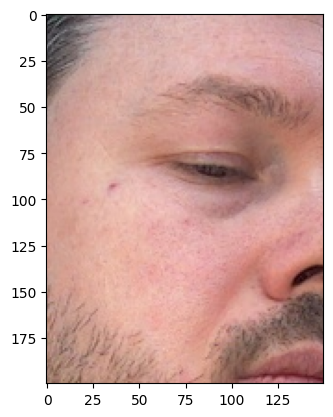

In [9]:
import cv2
x1, y1 = 550, 200
x2, y2 = 700, 400

imgcopy = raw_images[0][1].copy()
zoomed = imgcopy[y1:y2, x1:x2]
plt.imshow(cv2.cvtColor(zoomed, cv2.COLOR_BGR2RGB))

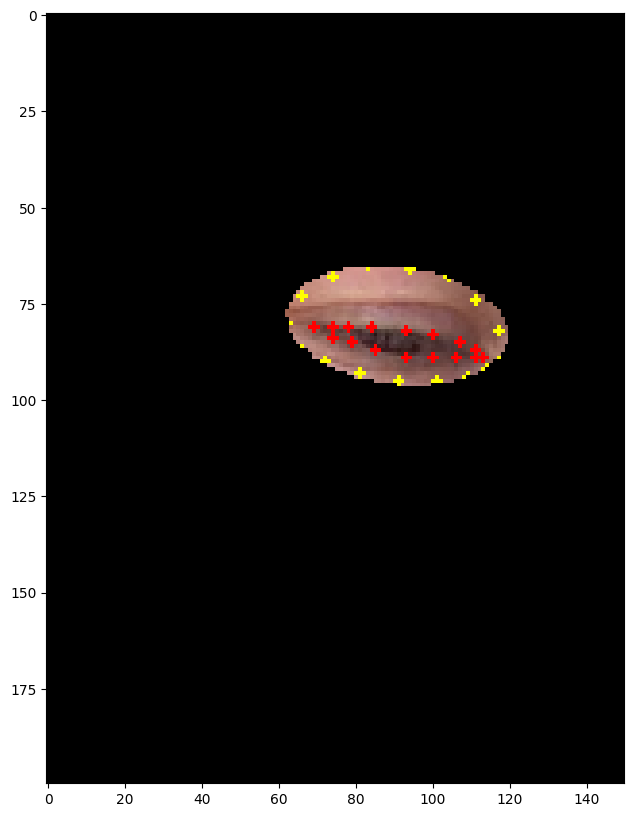

In [10]:
imgcopy = raw_images[0][1].copy()
import mediapipe as mp
import cv2
detector = mp.solutions.face_mesh.FaceMesh(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5, refine_landmarks=True)

x1, y1 = 100, 200
x2, y2 = 300, 400

# Crop the image to the defined area
zoomed = imgcopy[y1:y2, x1:x2]

landmarks = detector.process(cv2.cvtColor(imgcopy, cv2.COLOR_BGR2RGB)).multi_face_landmarks[0].landmark
left_eye_landmarks_halo_x2 = [
    # Lower contour.
    # 33, 7, 163, 144, 145, 153, 154, 155, 133,
    # upper contour (excluding corners).
    # 246, 161, 160, 159, 158, 157, 173,
    # Halo x2 lower contour.
    130, 25, 110, 24, 23, 22, 26, 112, 243,
    # Halo x2 upper contour (excluding corners).
    247, 30, 29, 27, 28, 56, 190,
    # Halo x3 lower contour.
    # 226, 31, 228, 229, 230, 231, 232, 233, 244,
    # Halo x3 upper contour (excluding corners).
    # 113, 225, 224, 223, 222, 221, 189,
    # Halo x4 upper contour (no lower because of mesh structure) or
    # eyebrow inner contour.
    # 35, 124, 46, 53, 52, 65,
    # Halo x5 lower contour.
    # 143, 111, 117, 118, 119, 120, 121, 128, 245,
    # Halo x5 upper contour (excluding corners) or eyebrow outer contour.
    # 156, 70, 63, 105, 66, 107, 55, 193
]
left_eye_landmarks_halo_x1 = [
    # Lower contour.
    33, 7, 163, 144, 145, 153, 154, 155, 133,
    # upper contour (excluding corners).
    246, 161, 160, 159, 158, 157, 173,
]
for i in left_eye_landmarks_halo_x1:
    x = int(landmarks[i].x * imgcopy.shape[1])
    y = int(landmarks[i].y * imgcopy.shape[0])
    cv2.circle(imgcopy, (x, y), 1, (0, 0, 255), -1)
for i in left_eye_landmarks_halo_x2:
    x = int(landmarks[i].x * imgcopy.shape[1])
    y = int(landmarks[i].y * imgcopy.shape[0])
    # print(f"Landmark {i} ({eye_landmark_names[i]}) at {x}x{y} (min {min_x}x{min_y}, max {max_x}x{max_y})")
    cv2.circle(imgcopy, (x, y), 1, (0, 255, 255), -1)
    #cv2.putText(imgcopy, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1, cv2.LINE_AA)
fig = plt.figure(figsize=(10, 10))

import numpy as np

# Initialize an empty mask with the same size as the image
mask = np.zeros_like(imgcopy)
# # mask = cv2.convertScaleAbs(mask)
# result = cv2.bitwise_and(imgcopy, mask)
# mask.dtype

# image = imgcopy
# mask = np.zeros_like(image)
# 
# # Define the center and radius of the circle
# center = (image.shape[1] // 2, image.shape[0] // 2)  # Center of the image
# radius = min(image.shape[0], image.shape[1]) // 4  # Radius as a quarter of the smallest dimension
# 
# # Draw a white circle on the mask
# cv2.circle(mask, center, radius, (255, 255, 255), thickness=-1)  # -1 fills the circle
# 
# # Apply the mask to the original image using bitwise AND
# masked_image = cv2.bitwise_and(image, mask)

# Create an array of points for the polygon
points = np.array([(landmarks[i].x * imgcopy.shape[1], landmarks[i].y * imgcopy.shape[0]) for i in left_eye_landmarks_halo_x2], np.int32)
# # Reshape points array to shape (number_of_points, 1, 2)
# # points = points.reshape((-1, 1, 2))
# # points
# 
# # 
# # # Draw the polygon on the mask
# # cv2.fillPoly(mask, [points], (255, 255, 255))
# # 
# # # Bitwise-AND the mask and the original image
# # result = cv2.bitwise_and(imgcopy, mask)
# 
ellipse = cv2.fitEllipse(points)
# 
# # Draw and fill the ellipse on the mask
cv2.ellipse(mask, ellipse, (255, 255, 255), -1)
# 
# # Invert the mask
#mask = cv2.bitwise_not(mask)
# 
# # 
# # # Bitwise-AND the mask and the original image
result = cv2.bitwise_and(imgcopy, mask)

# # # 
# # # 
x1, y1 = 550, 200
x2, y2 = 700, 400
# # 
# zoomed = result[y1:y2, x1:x2]
result = result[y1:y2, x1:x2]
# 
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))


In [11]:
images_and_filenames = process_frames(raw_images)
images = list(map(lambda x: x[1], images_and_filenames))

In [12]:
images_and_filenames[0][1].shape


(33, 99, 3)

In [13]:
raw_images[0][1].shape

(720, 1280, 3)

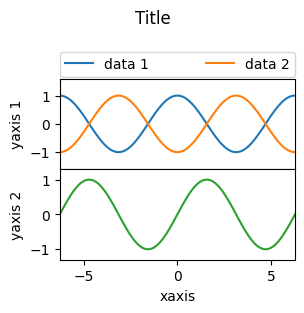

In [14]:
x_min = -2*np.pi
x_max = 2*np.pi
resolution = 101
x_vals = np.linspace(x_min, x_max, resolution)
y_upper = np.cos(x_vals)
y_lower = -np.cos(x_vals)
data3 = np.sin(x_vals)

fig = plt.figure(figsize=(80/25.4, 80/25.4))  # figsize is needed for later usage of the plot             
#
# This is the line that changes. Instruct the gridspec to have zero vertical pad
#     
ax = fig.subplots(2, 1, sharex=True, gridspec_kw=dict(hspace=0))

ax[0].plot(x_vals, y_upper, label="data 1")
ax[0].plot(x_vals, y_lower, label="data 2")

ax[1].set_xlim([x_min,x_max])
ax[0].set_ylim([-1.6,1.6])
ax[1].set_ylim([-1.3,1.3])

ax[1].plot(x_vals, data3, ls='-', label="data 3", color='C2')

ax[1].set_xlabel("xaxis")
ax[0].set_ylabel("yaxis 1")
ax[1].set_ylabel("yaxis 2")
ax[0].legend(bbox_to_anchor=(0, 1.02, 1., 0.102), loc='lower left', ncol=2, mode="expand", borderaxespad=0)

fig.suptitle("Title")
fig.tight_layout()  # Now tight_layout does not add padding between axes
# fig.savefig('figure.png')                                                                                    
plt.show()


In [15]:
rgb_data = images[0][1]
h, w = rgb_data.shape

inches_for_width = w / fig.dpi
inches_for_height = h / fig.dpi
h, w, inches_for_width, inches_for_height


(99, 3, 0.03, 0.99)

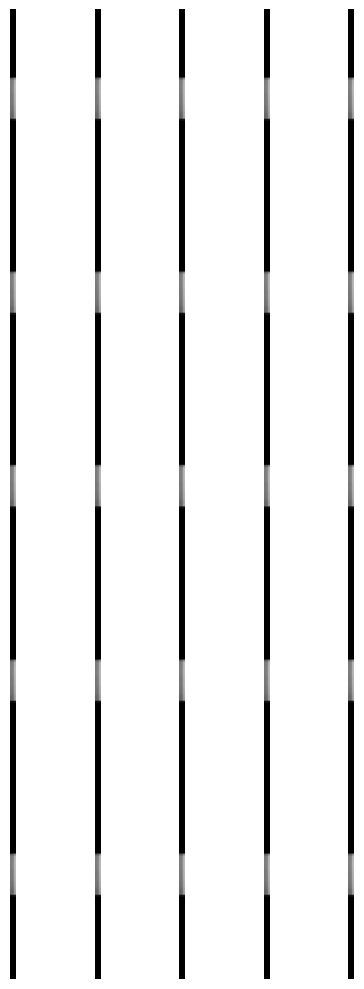

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Determine the number of rows and columns for the grid
# num_images = len(images)
# grid_size = int(np.ceil(np.sqrt(num_images)))

fig = plt.figure(figsize=(5, 10))  # figsize is needed for later usage of the plot             



# Create a figure and a grid of subplots
# fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15), gridspec_kw=dict(hspace=0))
ax = fig.subplots(5, 5, sharex=True, gridspec_kw=dict(hspace=0))
ax[0][0].imshow(cv2.cvtColor(images[0][1], cv2.COLOR_BGR2RGB))

for row in range(0, 5):
    for col in range(0, 5):
        a = ax[row][col]
        a.axis('off')
        a.imshow(cv2.cvtColor(images[0][1], cv2.COLOR_BGR2RGB))

fig.tight_layout()  # Now tight_layout does not add padding between axes
# fig.savefig('figure.png')                                                                                    
plt.show()


In [17]:
selected_images = []
selected_images.append(images[0])
selected_images.append(images[6])
selected_images.append(images[50])

In [18]:
rgb_data = selected_images[0]
h, w, _ = rgb_data.shape

inches_for_width = w / fig.dpi
inches_for_height = h / fig.dpi
h, w, inches_for_width, inches_for_height

(33, 99, 0.99, 0.33)

Original size: (33, 99) 33, shrunk (29, 89), padding: (2, 2, 5, 5)
final size: (33, 99)
Original size: (33, 99) 33, shrunk (29, 89), padding: (2, 2, 5, 5)
final size: (33, 99)
Original size: (33, 99) 33, shrunk (29, 89), padding: (2, 2, 5, 5)
final size: (33, 99)
Original size: (33, 99) 33, shrunk (29, 89), padding: (2, 2, 5, 5)
final size: (33, 99)
Original size: (33, 99) 33, shrunk (29, 89), padding: (2, 2, 5, 5)
final size: (33, 99)
Original size: (33, 99) 33, shrunk (29, 89), padding: (2, 2, 5, 5)
final size: (33, 99)
Original size: (33, 99) 33, shrunk (29, 89), padding: (2, 2, 5, 5)
final size: (33, 99)
Original size: (33, 99) 33, shrunk (29, 89), padding: (2, 2, 5, 5)
final size: (33, 99)
Original size: (33, 99) 33, shrunk (29, 89), padding: (2, 2, 5, 5)
final size: (33, 99)
Original size: (33, 99) 33, shrunk (29, 89), padding: (2, 2, 5, 5)
final size: (33, 99)
Original size: (33, 99) 33, shrunk (29, 89), padding: (2, 2, 5, 5)
final size: (33, 99)
Original size: (33, 99) 33, shru

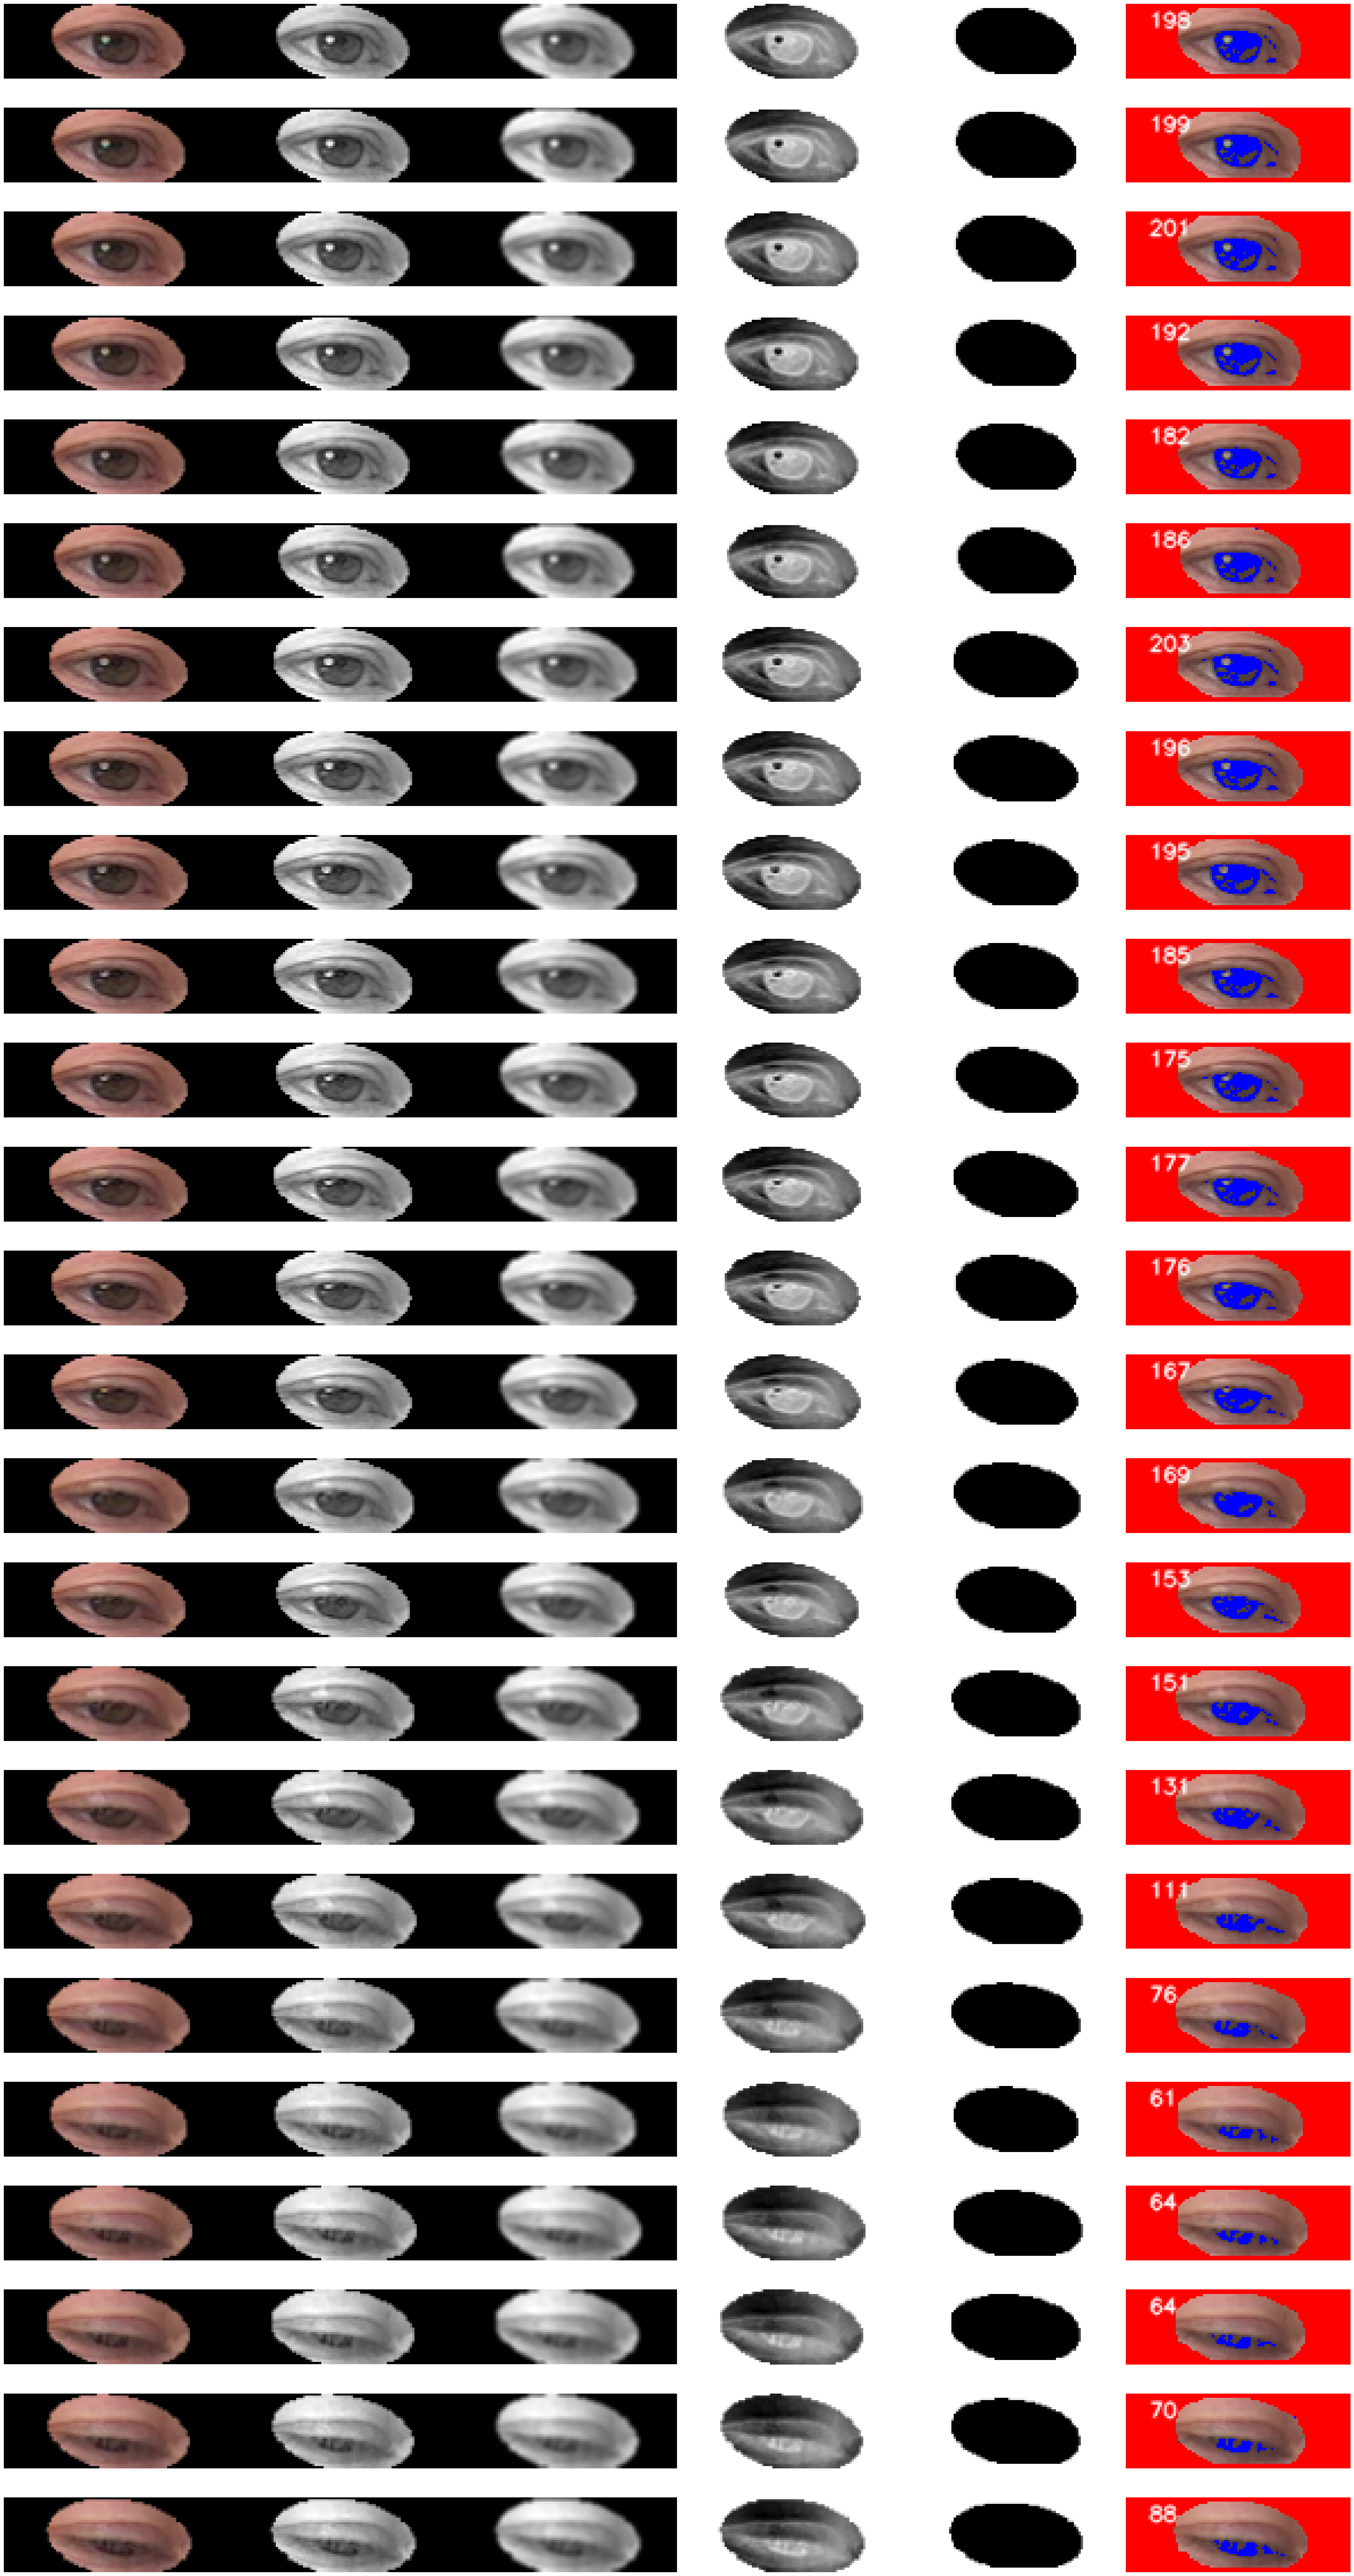

In [35]:
selected_images = images[0:25]
import cv2

images_to_display = len(selected_images)    

fig = plt.figure()

rgb_data = selected_images[0]
h, w, _ = rgb_data.shape

inches_for_width = w / fig.dpi
inches_for_height = h / fig.dpi

columns = 6
fig.set_size_inches(inches_for_width * columns, inches_for_height * images_to_display) 

for i in range(images_to_display):
    col = 0
    # First column
    ax1 = fig.add_axes([0, i*inches_for_height, inches_for_width, inches_for_height])
    ax1.axis('off')
    col += 1
    ax2 = fig.add_axes([inches_for_width, i*inches_for_height, inches_for_width, inches_for_height])
    ax2.axis('off')
    col += 1
    ax3 = fig.add_axes([inches_for_width * col, i*inches_for_height, inches_for_width, inches_for_height])
    ax3.axis('off')
    col += 1
    ax4 = fig.add_axes([inches_for_width * col, i*inches_for_height, inches_for_width, inches_for_height])
    ax4.axis('off')
    col += 1
    ax5 = fig.add_axes([inches_for_width * col, i*inches_for_height, inches_for_width, inches_for_height])
    ax5.axis('off')
    col += 1
    ax6 = fig.add_axes([inches_for_width * col, i*inches_for_height, inches_for_width, inches_for_height])
    ax6.axis('off')
    col += 1
    # ax7 = fig.add_axes([inches_for_width * col, i*inches_for_height, inches_for_width, inches_for_height])
    # ax7.axis('off')
    # col += 1
    # ax8 = fig.add_axes([inches_for_width * col, i*inches_for_height, inches_for_width, inches_for_height])
    # ax8.axis('off')
    # col += 1
    # ax9 = fig.add_axes([inches_for_width * col, i*inches_for_height, inches_for_width, inches_for_height])
    # ax9.axis('off')
    # col += 1
    # ax10 = fig.add_axes([inches_for_width * col, i*inches_for_height, inches_for_width, inches_for_height])
    # ax10.axis('off')
    # col += 1

    rgb = cv2.cvtColor(selected_images[i], cv2.COLOR_BGR2RGB)
    ax1.imshow(rgb, aspect='equal')

    gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
    ax2.imshow(gray, cmap='gray', aspect='equal')

    img = gray
    img = cv2.GaussianBlur(img, (3, 3), 1)
    ax3.imshow(img, cmap='gray', aspect='equal')

    invert = cv2.bitwise_not(gray)
    ax4.imshow(invert, cmap='gray', aspect='equal')

    # img = cv2.Canny(img, 20, 100)
    # ax5.imshow(img, cmap='gray', aspect='equal')

    # Hopefully the area we don't care about
    mask_outside_eye = cv2.inRange(invert, 255, 255)

    # Get the original size of the image
    original_size = mask_outside_eye.shape
    
    # Define the scale factor for shrinking the image
    scale_factor = 0.9  # 90% of the original size
    
    # Calculate the new size of the image
    new_width = int(original_size[1]*scale_factor)
    new_height = int(original_size[0]*scale_factor)
    #new_size = (int(original_size[1]*scale_factor), int(original_size[0]*scale_factor))
    
    # Resize (shrink) the image
    shrunken_mask_outside_eye = cv2.resize(mask_outside_eye, (new_width, new_height))
    
    # Calculate the size of the padding
    pad_top = (original_size[0] - new_height) // 2
    pad_bottom = original_size[0] - new_height - pad_top
    pad_left = (original_size[1] - new_width) // 2
    pad_right = original_size[1] - new_width - pad_left
    
    # print(f"Original size: {original_size} {original_size[0]}, shrunk {shrunken_mask_outside_eye.shape}, padding: {pad_top, pad_bottom, pad_left, pad_right}")
    
    # Pad the shrunken image with white pixels to bring it back to the original size
    mask_outside_eye = cv2.copyMakeBorder(shrunken_mask_outside_eye, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=255)

    # print(f"final size: {mask_outside_eye.shape}")

    # Hopefully the iris+pupil
    mask_light_areas = cv2.inRange(invert, 200, 255)
    copy = rgb.copy()
    copy[mask_light_areas == 255] = (0, 0, 255)
    copy[mask_outside_eye == 255] = (255, 0, 0)

    ax5.imshow(mask_outside_eye, cmap='gray', aspect='equal')

    pixels_over_threshold = cv2.countNonZero(cv2.inRange(copy, (0, 0, 150), (0, 0, 255)))
    cv2.putText(copy, str(pixels_over_threshold), (10, 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1, cv2.LINE_AA)

    ax6.imshow(copy, aspect='equal')

    

plt.subplots_adjust(wspace=0, hspace=0)  # Remove padding between subplots
plt.show()

In [20]:

fig = plt.figure()

rgb_data = images[0]
h, w = rgb_data.shape
fig.set_size_inches(w / fig.dpi, h / fig.dpi)
fig.get_size_inches()

ValueError: too many values to unpack (expected 2)

<Figure size 640x480 with 0 Axes>